In [2]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather data from file.

In [3]:
#Read the twitter_archive_enhanced.csv file and
#set it as a dataframe called df.
df=pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [4]:
import os 
import requests
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
response
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb')as file: file.write(response.content)

In [5]:
#open tsv file
images=pd.read_table('image_predictions/image-predictions.tsv',sep='\t')

In [6]:
#importing libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

consumer_key='iw4yNXhe1o1YT5dMqKEDMzlkS'
consumer_secret='yziJwAis4WnXVxBc7ZyyphYDf1HGoSZuUJlNi9jTWD2bYQoCfO'
access_token='968444815057739776-DnrOBfEifFvuzmMpYbtizeGogqhlYa8'
access_secret='KUjFyPmDLG9YNAWbAsLdcKZLnfmJmYpA5D6t8TBvpu7dz'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth_handler=auth,
              wait_on_rate_limit=True,
              wait_on_rate_limit_notify=True)

In [7]:
#Twitter Query using tweet_id information from the df
tweet_ids=list(df.tweet_id)
tweet_data={}
for tweet in tweet_ids:
    try:
        tweet_status=api.get_status(tweet,
                                   wait_on_rate_limit=True,
                                   wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)]=tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Rate limit reached. Sleeping for: 721
Error for: 754011816964026368
Rate limit reached. Sleeping for: 725


In [8]:
import json
with open('tweet_json.txt','w')as outfile:
    json.dump(tweet_data,outfile,
             sort_keys=True,
             indent=4,
             ensure_ascii=False)

In [9]:
tweet_df=pd.read_json('tweet_json.txt',orient='index')

# Assessing the data

After gathering each of the above pieces of data,assess them visually and programmatically for quality and tidiness issues. Detect and documented at Eight(8) quality issues and Two(2) Tidiness issues in my wrangle_act.ipynb jupyter notebook.to meet specifications, thte issues that satisfy the project motivation must be assessed.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality issues

Issues with the Data's content.

Need to remove rows that have been retweeted. Thereby they are not orignal tweets

# A Tweet that has been retweeted

The relevant field is retweeted_count. This field provides. the number of times this tweet was retweeted. Note that this number may vary over time , as additional people retweet the tweet.

# A tweet that is a retweet

want to exclude any tweet that is a retweet. Two fields are significant.first,the retweeted_status containts the present or absence of this field can be used identify that are retweets.second, the retweets_count is the count of the retweets of the source tweet, not this tweet.

# Data frame table

* Names of dogs are miss labled, mispelled or missing. Cross-referance text data with names column.
* Excluded columns from data set that are not needed for the anlysis.
* Records have a retweeted_status _id, these will need to be exluded from the dataset.

# Image predictions Table

* p1 column capitalize the first letter of the word make consistent.
* p2 column capitalize the first letter of the word make consistent.
* p3 column capitalize the first letter of the word make consistent.
* Remove the (_) between the words.

# Tweet_df table

* Rename the id column to "tweet_id" to match the other 2 tables.
* Records have a retweeted_status, will need to be executed.

# Tidyness issues

Issues with the Structure of the data.

# DataFrame table

* Parse the datetime information into seprate columns.
* Drop columns that are not needed & rearrange column order for an easier read.
* Combine eacg dog stage column into a single column name "stage".
* tweet_id column needs to be a converted from a number to string value.
* Date and time columns need to be converted to datetime objects.
* Rating coumns need to be converted to a float values.

# tweet_df table

* Cnvert id column from a number to a string.
* Reindex the tweet_dftable using the tweet_id.
* Change column order in the Tweet_df and the df tables for an easier read of the data.
* Consoildate the tweet_df table into the folling columns tweet_id, retweet count, favroite count.text

# All tables

* Perform an inner join between all these datasets

# Cleaning Data

In [12]:
#copy the dataframes
df_clean=df.copy()
images_clean=images.copy()
tweet_df_clean=tweet_df.copy()

In [13]:
#missing data
#replacing faulty names with None value or corrected name
df_clean['name'].replace('the','None',inplace=True)
df_clean['name'].replace("light",'None',inplace=True)
df_clean['name'].replace("life",'None',inplace=True)
df_clean['name'].replace("an",'None',inplace=True)
df_clean['name'].replace("a",'None',inplace=True)
df_clean['name'].replace("by",'None',inplace=True)
df_clean['name'].replace("actually",'None',inplace=True)
df_clean['name'].replace("just",'None',inplace=True)
df_clean['name'].replace("getting",'None',inplace=True)
df_clean['name'].replace("infuriating",'None',inplace=True)
df_clean['name'].replace("old",'None',inplace=True)
df_clean['name'].replace("all",'None',inplace=True)
df_clean['name'].replace("this",'None',inplace=True)
df_clean['name'].replace("very",'None',inplace=True)
df_clean['name'].replace("mad",'None',inplace=True)
df_clean['name'].replace("not",'None',inplace=True)
df_clean['name'].replace("one",'None',inplace=True)
df_clean['name'].replace("O","o'Malley",inplace=True)
df_clean['name'].replace("quite","None",inplace=True)
df_clean['name'].replace("such","None",inplace=True)

In [14]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [15]:
#Identify how many tweets are retweets by the "retweeted_status" Columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_clean[df_clean['retweeted_status_id'].notnull()==True]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
74    878316110768087041                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
91    874434818259525634                    NaN                  NaN   
95    873697596434513921                    NaN                  NaN   
97    873337748698140672                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
109   871166179821445120                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
124   868639477480148993                    NaN                  NaN   
130   867072653475098625                    NaN                  NaN   
132   866816280283807744                    NaN                  NaN   
137   866094527597207552                    NaN                  NaN   
146   863471782782697472                    NaN                  NaN   
155   861769973181624320                    NaN                  NaN   
159   860981674716409858                    NaN                  NaN   
160   860924035999428608                    NaN                  NaN   
165   860177593139703809                    NaN                  NaN   
171   858860390427611136                    NaN                  NaN   
180   857062103051644929                    NaN                  NaN   
182   856602993587888130                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   
194   855245323840757760                    NaN                  NaN   
195   855138241867124737                    NaN                  NaN   
204   852936405516943360                    NaN                  NaN   
211   851953902622658560                    NaN                  NaN   
...                  ...                    ...                  ...   
784   775096608509886464                    NaN                  NaN   
794   773336787167145985                    NaN                  NaN   
800   772615324260794368                    NaN                  NaN   
811   771171053431250945                    NaN                  NaN   
815   771004394259247104                    NaN                  NaN   
818   770743923962707968                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
826   769335591808995329                    NaN                  NaN   
829   768909767477751808                    NaN                  NaN   
833   768554158521745409                    NaN                  NaN   
841   766864461642756096                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
860   763167063695355904                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
872   761371037149827077                    NaN                  NaN   
885   760153949710192640                    NaN                  NaN   
890   759566828574212096                    NaN                  NaN   
895   759159934323924993                    NaN                  NaN   
908   757729163776290825                    NaN                  NaN   
911   757597904299253760                    NaN                  NaN   
926   754874841593970688                    NaN                  NaN   
937   753298634498793472                    NaN                  NaN   
943   752701944171524096                    NaN                  NaN   
949   752309394570878976                    NaN         

In [17]:
#remove these values from the dataframes using the drop() functions
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()==True].index,inplace=True)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [19]:
#DF table:clean timestamp column
from datetime import datetime,timedelta
#what data type is timestap currently in?
type(df_clean['timestamp'].iloc[0])

str

In [20]:
#use pd.to_datetime toconvert the column from string to datetime objects.
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])
#Now that the timestamp column are actually datetime objects, use.apply() to create columns

df_clean['date']=df_clean['timestamp'].apply(lambda time:time.strftime('%m-%d-%y'))
df_clean['time']=df_clean['timestamp'].apply(lambda time:time.strftime('%H:%m'))

In [21]:
df_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo      date   time  
0                  10  Phineas  None    None   None  None  08-01-17  16:08

In [22]:
df_clean['stage']=df[['doggo','floofer','pupper','puppo']].apply(lambda x: ''.join(x),axis=1)
df_clean['stage'].replace("NoneNoneNoneNone","None",inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo",inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer",inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper",inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo",inplace=True)

In [23]:
df_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [24]:
#Remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
              'retweeted_status_user_id',
              'retweeted_status_id',
              'retweeted_status_timestamp',
              'in_reply_to_status_id',
              'in_reply_to_user_id',
              'in_reply_to_status_id',
              'expanded_urls',
              'source',
              'doggo',
              'floofer',
              'pupper',
              'puppo',
              'text'],axis=1,inplace=True)

In [25]:
df_clean.head()

tweet_id  rating_numerator  rating_denominator      name  \
0  892420643555336193                13                  10   Phineas   
1  892177421306343426                13                  10     Tilly   
2  891815181378084864                12                  10    Archie   
3  891689557279858688                13                  10     Darla   
4  891327558926688256                12                  10  Franklin   

       date   time stage  
0  08-01-17  16:08  None  
1  08-01-17  00:08  None  
2  07-31-17  00:07  None  
3  07-30-17  15:07  None  
4  07-29-17  16:07  None

In [26]:
#Change the order(the index) of the df_clean columns
columnTitles=['tweet_id',
             'date',
             'time',
             'name',
             'stage',
             'rating_numerator',
             'rating_denominator']
df_clean=df_clean.reindex(columns=columnTitles)

In [27]:
df_clean.head()

tweet_id      date   time      name stage  rating_numerator  \
0  892420643555336193  08-01-17  16:08   Phineas  None                13   
1  892177421306343426  08-01-17  00:08     Tilly  None                13   
2  891815181378084864  07-31-17  00:07    Archie  None                12   
3  891689557279858688  07-30-17  15:07     Darla  None                13   
4  891327558926688256  07-29-17  16:07  Franklin  None                12   

   rating_denominator  
0                  10  
1                  10  
2                  10  
3                  10  
4                  10

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
date                  2175 non-null object
time                  2175 non-null object
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dtypes: int64(3), object(4)
memory usage: 135.9+ KB


In [29]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

In [30]:
type(df_clean['tweet_id'].iloc[0])

str

In [31]:
df_clean['date']=pd.to_datetime(df_clean['date'])
df_clean['time']=pd.to_datetime(df_clean['time'])

In [32]:
type(df_clean['date'].iloc[0])
type(df_clean['time'].iloc[0])

pandas._libs.tslib.Timestamp

In [33]:
df_clean['rating_numerator']=df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator']=df_clean['rating_denominator'].astype(float)

In [34]:
type(df_clean['rating_numerator'].iloc[0])

numpy.float64

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 135.9+ KB


# Tweet_DF_CLEAN DataFrame

In [36]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [37]:
tweet_df_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [38]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [39]:
tweet_df_clean.tweet_id=tweet_df_clean.tweet_id.astype(str)

In [40]:
type(df_clean['tweet_id'].iloc[0])

str

In [41]:
#Identify how many tweets are retweets by the "retweeted_status" columns
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1822 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
tweet_id                         2341 non-null object
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [42]:
#Single out the non-null values inthe 'retweet_status'columns
tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

contributors  coordinates          created_at  \
1991-02-26 06:48:02.905632768           NaN          NaN 2015-11-20 03:51:47   
1991-02-26 06:48:24.950915073           NaN          NaN 2015-11-20 03:51:52   
1992-07-24 17:26:49.858043904           NaN          NaN 2016-03-21 19:31:59   
1993-07-28 05:05:15.802583040           NaN          NaN 2016-06-17 16:01:16   
1993-08-28 07:04:05.350707200           NaN          NaN 2016-06-25 01:52:36   
1993-09-05 15:18:28.580548608           NaN          NaN 2016-06-27 01:37:04   
1993-11-03 06:49:54.570878976           NaN          NaN 2016-07-11 01:11:51   
1993-11-07 19:52:24.171524096           NaN          NaN 2016-07-12 03:11:42   
1993-11-14 17:37:14.498793472           NaN          NaN 2016-07-13 18:42:44   
1993-12-02 23:27:21.593970688           NaN          NaN 2016-07-18 03:06:01   
1994-01-03 11:51:44.299253760           NaN          NaN 2016-07-25 15:26:30   
1994-01-05 00:19:23.776290825           NaN          NaN 2016-07-26 00:08:05   
1994-01-21 13:45:34.323924993           NaN          NaN 2016-07-29 22:53:27   
1994-01-26 06:47:08.574212096           NaN          NaN 2016-07-31 01:50:18   
1994-02-02 01:52:29.710192640           NaN          NaN 2016-08-01 16:43:19   
1994-02-16 03:57:17.149827077           NaN          NaN 2016-08-05 01:19:35   
1994-02-20 13:21:42.866649088           NaN          NaN 2016-08-06 02:27:27   
1994-03-08 22:51:03.695355904           NaN          NaN 2016-08-10 00:16:21   
1994-04-11 15:28:12.750233600           NaN          NaN 2016-08-18 01:03:45   
1994-04-20 17:54:21.642756096           NaN          NaN 2016-08-20 05:08:29   
1994-05-10 07:15:58.521745409           NaN          NaN 2016-08-24 21:02:45   
1994-05-14 10:02:47.477751808           NaN          NaN 2016-08-25 20:35:48   
1994-05-19 08:19:51.808995329           NaN          NaN 2016-08-27 00:47:53   
1994-05-28 02:56:07.776997377           NaN          NaN 2016-08-29 03:00:36   
1994-06-09 14:10:53.431250945           NaN          NaN 2016-09-01 02:21:21   
1994-06-26 07:22:04.260794368           NaN          NaN 2016-09-05 02:00:22   
1994-07-04 15:46:27.167145985           NaN          NaN 2016-09-07 01:47:12   
1994-08-03 07:24:21.951791106           NaN          NaN 2016-09-14 03:27:11   
1994-08-07 08:58:26.839351296           NaN          NaN 2016-09-15 02:42:54   
1994-08-13 23:03:32.571455488           NaN          NaN 2016-09-16 16:24:19   
...                                     ...          ...                 ...   
1996-09-04 10:46:33.020538882           NaN          NaN 2017-03-15 02:10:39   
1996-10-12 05:32:39.547420673           NaN          NaN 2017-03-24 02:22:04   
1996-11-14 11:39:34.464610304           NaN          NaN 2017-04-01 00:39:12   
1996-11-14 13:41:05.427394560           NaN          NaN 2017-04-01 01:08:10   
1996-12-04 02:54:54.696017920           NaN          NaN 2017-04-05 17:00:34   
1996-12-29 12:09:45.021730816           NaN          NaN 2017-04-11 18:15:55   
1996-12-30 13:51:42.622658560           NaN          NaN 2017-04-12 00:23:33   
1997-01-10 22:46:45.516943360           NaN          NaN 2017-04-14 17:27:40   
1997-02-05 10:24:01.867124737           NaN          NaN 2017-04-20 19:16:59   
1997-02-06 16:08:43.840757760           NaN          NaN 2017-04-21 02:22:29   
1997-02-19 05:40:35.276025856           NaN          NaN 2017-04-24 02:15:55   
1997-02-22 09:16:33.587888130           NaN          NaN 2017-04-24 20:17:23   
1997-02-27 16:48:23.051644929           NaN          NaN 2017-04-26 02:41:43   
1997-03-20 12:19:50.427611136           NaN          NaN 2017-05-01 01:47:28   
1997-04-04 18:13:13.139703809           NaN          NaN 2017-05-04 17:01:34   
1997-04-13 09:33:55.999428608           NaN          NaN 2017-05-06 18:27:40   
1997-04-14 01:34:34.716409858           NaN          NaN 2017-05-06 22:16:42   
1997-05-12 21:16:22.782697472           NaN          NaN 2017-05-13 19:11:30   
1997-06-12 05:48:47.597207552  

In [43]:
#remove the tweets that are retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True].index,inplace=True)

In [44]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
tweet_id                         2174 non-null object
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2

In [45]:
tweet_df_clean.drop(['contributors',
                    'coordinates',
                    'created_at',
                    'entities',
                    'extended_entities',
                    'favorited',
                    'geo',
                    'id_str',
                    'in_reply_to_screen_name',
                    'in_reply_to_status_id',
                    'in_reply_to_status_id_str',
                    'in_reply_to_user_id',
                    'in_reply_to_user_id_str',
                    'is_quote_status',
                    'lang',
                    'place',
                    'possibly_sensitive',
                    'possibly_sensitive_appealable',
                    'quoted_status',
                    'quoted_status_id',
                    'quoted_status_id_str',
                    'source',
                    'truncated',
                    'user'],axis=1,inplace=True)

In [46]:
tweet_df_clean.head(10)

favorite_count            tweet_id  \
1991-02-08 13:48:08.022790149            2552  666020888022790144   
1991-02-08 16:08:05.002620928             128  666029285002620928   
1991-02-08 17:16:52.701032449             125  666033412701032448   
1991-02-08 20:17:06.329800704             297  666044226329800704   
1991-02-08 21:40:48.165822465             109  666049248165822464   
1991-02-08 22:05:58.794694657             132  666050758794694656   
1991-02-08 22:24:13.826850816            1209  666051853826850816   
1991-02-08 23:25:25.042405380             433  666055525042405376   
1991-02-08 23:51:30.499244032             294  666057090499244032   
1991-02-09 00:16:40.524156928             111  666058600524156928   

                               retweet_count  retweeted retweeted_status  \
1991-02-08 13:48:08.022790149            507          0              NaN   
1991-02-08 16:08:05.002620928             47          0              NaN   
1991-02-08 17:16:52.701032449             44          0              NaN   
1991-02-08 20:17:06.329800704            140          0              NaN   
1991-02-08 21:40:48.165822465             40          0              NaN   
1991-02-08 22:05:58.794694657             59          0              NaN   
1991-02-08 22:24:13.826850816            843          0              NaN   
1991-02-08 23:25:25.042405380            247          0              NaN   
1991-02-08 23:51:30.499244032            141          0              NaN   
1991-02-09 00:16:40.524156928             57          0              NaN   

                                                                            text  
1991-02-08 13:48:08.022790149  Here we have a Japanese Irish Setter. Lost eye...  
1991-02-08 16:08:05.002620928  This is a western brown Mitsubishi terrier. Up...  
1991-02-08 17:16:52.701032449  Here is a very happy pup. Big fan of well-main...  
1991-02-08 20:17:06.329800704  This is a purebred Piers Morgan. Loves to Netf...  
1991-02-08 21:40:48.165822465  Here we have a 1949 1st generation vulpix. Enj...  
1991-02-08 22:05:58.794694657  This is a truly beautiful English Wilson Staff...  
1991-02-08 22:24:13.826850816  This is an odd dog. Hard on the outside but lo...  
1991-02-08 23:25:25.042405380  Here is a Siberian heavily armored polar bear ...  
1991-02-08 23:51:30.499244032  My oh my. This is a rare blond Canadian terrie...  
1991-02-09 00:16:40.524156928  Here is the Rand Paul of retrievers folks! He'...

In [47]:
images_clean['p1']=images_clean['p1'].str.replace('_','')
images_clean['p2']=images_clean['p2'].str.replace('_','')
images_clean['p3']=images_clean['p3'].str.replace('_','')

In [48]:
images_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                    p1   p1_conf  p1_dog                 p2  \
0        1  Welshspringerspaniel  0.465074    True             collie   
1        1               redbone  0.506826    True  miniaturepinscher   
2        1        Germanshepherd  0.596461    True           malinois   
3        1    Rhodesianridgeback  0.408143    True            redbone   
4        1     miniaturepinscher  0.560311    True         Rottweiler   

    p2_conf  p2_dog                  p3   p3_conf  p3_dog  
0  0.156665    True    Shetlandsheepdog  0.061428    True  
1  0.074192    True  Rhodesianridgeback  0.072010    True  
2  0.138584    True          bloodhound  0.116197    True  
3  0.360687    True   miniaturepinscher  0.222752    True  
4  0.243682    True            Doberman  0.154629    True

In [49]:
images_clean['p1']=images_clean['p1'].str.title()
images_clean['p2']=images_clean['p2'].str.title()
images_clean['p3']=images_clean['p3'].str.title()

In [50]:
images_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                    p1   p1_conf  p1_dog                 p2  \
0        1  Welshspringerspaniel  0.465074    True             Collie   
1        1               Redbone  0.506826    True  Miniaturepinscher   
2        1        Germanshepherd  0.596461    True           Malinois   
3        1    Rhodesianridgeback  0.408143    True            Redbone   
4        1     Miniaturepinscher  0.560311    True         Rottweiler   

    p2_conf  p2_dog                  p3   p3_conf  p3_dog  
0  0.156665    True    Shetlandsheepdog  0.061428    True  
1  0.074192    True  Rhodesianridgeback  0.072010    True  
2  0.138584    True          Bloodhound  0.116197    True  
3  0.360687    True   Miniaturepinscher  0.222752    True  
4  0.243682    True            Doberman  0.154629    True

In [51]:
images_clean.tweet_id=images_clean.tweet_id.astype(str)

In [52]:
type(images_clean['tweet_id'].iloc[0])

str

In [53]:
df_merge=pd.merge(df_clean,tweet_df_clean,on='tweet_id',how='inner')

In [54]:
df_merge=pd.merge(df_merge,images_clean,on='tweet_id',how='inner')

In [55]:
df_merge

tweet_id       date                time        name   stage  \
0     891815181378084864 2017-07-31 2018-10-03 00:07:00      Archie    None   
1     891689557279858688 2017-07-30 2018-10-03 15:07:00       Darla    None   
2     891327558926688256 2017-07-29 2018-10-03 16:07:00    Franklin    None   
3     891087950875897856 2017-07-29 2018-10-03 00:07:00        None    None   
4     890729181411237888 2017-07-28 2018-10-03 00:07:00        None    None   
5     890609185150312448 2017-07-27 2018-10-03 16:07:00        Zoey    None   
6     890006608113172480 2017-07-26 2018-10-03 00:07:00        Koda    None   
7     889638837579907072 2017-07-25 2018-10-03 00:07:00         Ted    None   
8     889278841981685760 2017-07-24 2018-10-03 00:07:00      Oliver    None   
9     888917238123831296 2017-07-23 2018-10-03 00:07:00         Jim    None   
10    888554962724278272 2017-07-22 2018-10-03 00:07:00     Ralphus    None   
11    888078434458587136 2017-07-20 2018-10-03 16:07:00      Gerald    None   
12    887705289381826560 2017-07-19 2018-10-03 16:07:00     Jeffrey    None   
13    887517139158093824 2017-07-19 2018-10-03 03:07:00        None    None   
14    887343217045368832 2017-07-18 2018-10-03 16:07:00        None    None   
15    887101392804085760 2017-07-18 2018-10-03 00:07:00        None    None   
16    886983233522544640 2017-07-17 2018-10-03 16:07:00        Maya    None   
17    886736880519319552 2017-07-16 2018-10-03 23:07:00      Mingus    None   
18    886680336477933568 2017-07-16 2018-10-03 20:07:00       Derek    None   
19    886366144734445568 2017-07-15 2018-10-03 23:07:00      Roscoe  pupper   
20    885984800019947520 2017-07-14 2018-10-03 22:07:00       Jimbo    None   
21    885528943205470208 2017-07-13 2018-10-03 15:07:00      Maisey    None   
22    885167619883638784 2017-07-12 2018-10-03 16:07:00        None    None   
23    884562892145688576 2017-07-11 2018-10-03 00:07:00       Kevin    None   
24    884441805382717440 2017-07-10 2018-10-03 15:07:00        None    None   
25    883482846933004288 2017-07-08 2018-10-03 00:07:00       Bella    None   
26    883117836046086144 2017-07-07 2018-10-03 00:07:00        None    None   
27    882992080364220416 2017-07-06 2018-10-03 15:07:00       Rusty    None   
28    882762694511734784 2017-07-06 2018-10-03 00:07:00         Gus  pupper   
29    882627270321602560 2017-07-05 2018-10-03 15:07:00     Stanley    None   
...                  ...        ...                 ...         ...     ...   
1269  666804364988780544 2015-11-18 2018-10-03 02:11:00     Jockson    None   
1270  666786068205871104 2015-11-18 2018-10-03 01:11:00        None    None   
1271  666781792255496192 2015-11-18 2018-10-03 00:11:00        None    None   
1272  666776908487630848 2015-11-18 2018-10-03 00:11:00       Josep    None   
1273  666701168228331520 2015-11-17 2018-10-03 19:11:00        None    None   
1274  666691418707132416 2015-11-17 2018-10-03 18:11:00  Christoper    None   
1275  666644823164719104 2015-11-17 2018-10-03 15:11:00     Jimothy    None   
1276  666435652385423360 2015-11-17 2018-10-03 02:11:00        None    None   
1277  666428276349472768 2015-11-17 2018-10-03 01:11:00        None    None   
1278  666421158376562688 2015-11-17 2018-10-03 01:11:00        None    None   
1279  666418789513326592 2015-11-17 2018-10-03 00:11:00      Walter    None   
1280  666407126856765440 2015-11-17 2018-10-03 00:11:00        None    None   
1281  666396247373291520 2015-11-16 2018-10-03 23:11:00        None    None   
1282  666353288456101888 2015-11-16 2018-10-03 20:11:00        None    None   
1283  666345417576210432 2015-11-16 2018-10-03 20:11:00        None    None   
1284  666337882303524864 2015-11-16 2018-10-03 19:11:00        None    None   
1285  666293911632134144 2015-11-16 2018-10-03 16:11:00        None    None   
1286  666287406224695296 2015-11-16 2018-10-03 16:11:00        None    None   
1287  666273097616637952 2015-11-16 2018-10-03 15:11:00        Non

In [56]:
df_merge['date']=df_merge['date'].apply(lambda time:time.strftime('%m-%d-%Y'))
df_merge['time']=df_merge['time'].apply(lambda time:time.strftime('%H:%M'))

In [57]:
df_merge

tweet_id        date   time        name   stage  \
0     891815181378084864  07-31-2017  00:07      Archie    None   
1     891689557279858688  07-30-2017  15:07       Darla    None   
2     891327558926688256  07-29-2017  16:07    Franklin    None   
3     891087950875897856  07-29-2017  00:07        None    None   
4     890729181411237888  07-28-2017  00:07        None    None   
5     890609185150312448  07-27-2017  16:07        Zoey    None   
6     890006608113172480  07-26-2017  00:07        Koda    None   
7     889638837579907072  07-25-2017  00:07         Ted    None   
8     889278841981685760  07-24-2017  00:07      Oliver    None   
9     888917238123831296  07-23-2017  00:07         Jim    None   
10    888554962724278272  07-22-2017  00:07     Ralphus    None   
11    888078434458587136  07-20-2017  16:07      Gerald    None   
12    887705289381826560  07-19-2017  16:07     Jeffrey    None   
13    887517139158093824  07-19-2017  03:07        None    None   
14    887343217045368832  07-18-2017  16:07        None    None   
15    887101392804085760  07-18-2017  00:07        None    None   
16    886983233522544640  07-17-2017  16:07        Maya    None   
17    886736880519319552  07-16-2017  23:07      Mingus    None   
18    886680336477933568  07-16-2017  20:07       Derek    None   
19    886366144734445568  07-15-2017  23:07      Roscoe  pupper   
20    885984800019947520  07-14-2017  22:07       Jimbo    None   
21    885528943205470208  07-13-2017  15:07      Maisey    None   
22    885167619883638784  07-12-2017  16:07        None    None   
23    884562892145688576  07-11-2017  00:07       Kevin    None   
24    884441805382717440  07-10-2017  15:07        None    None   
25    883482846933004288  07-08-2017  00:07       Bella    None   
26    883117836046086144  07-07-2017  00:07        None    None   
27    882992080364220416  07-06-2017  15:07       Rusty    None   
28    882762694511734784  07-06-2017  00:07         Gus  pupper   
29    882627270321602560  07-05-2017  15:07     Stanley    None   
...                  ...         ...    ...         ...     ...   
1269  666804364988780544  11-18-2015  02:11     Jockson    None   
1270  666786068205871104  11-18-2015  01:11        None    None   
1271  666781792255496192  11-18-2015  00:11        None    None   
1272  666776908487630848  11-18-2015  00:11       Josep    None   
1273  666701168228331520  11-17-2015  19:11        None    None   
1274  666691418707132416  11-17-2015  18:11  Christoper    None   
1275  666644823164719104  11-17-2015  15:11     Jimothy    None   
1276  666435652385423360  11-17-2015  02:11        None    None   
1277  666428276349472768  11-17-2015  01:11        None    None   
1278  666421158376562688  11-17-2015  01:11        None    None   
1279  666418789513326592  11-17-2015  00:11      Walter    None   
1280  666407126856765440  11-17-2015  00:11        None    None   
1281  666396247373291520  11-16-2015  23:11        None    None   
1282  666353288456101888  11-16-2015  20:11        None    None   
1283  666345417576210432  11-16-2015  20:11        None    None   
1284  666337882303524864  11-16-2015  19:11        None    None   
1285  666293911632134144  11-16-2015  16:11        None    None   
1286  666287406224695296  11-16-2015  16:11        None    None   
1287  666273097616637952  11-16-2015  15:11        None    None   
1288  666268910803644416  11-16-2015  14:11        None    None   
1289  666104133288665088  11-16-2015  04:11        None    None   
1290  666102155909144576  11-16-2015  03:11        None    None   
1291  666099513787052032  11-16-2015  03:11        None    None   
1292  666073100786774016  11-16-2015  01:11        None    None   
1293  666071193221509120  11-16-2015  01:11        None    None   
1294  666058600524156928  11-16-2015  01:11        None    None   
1295  666057090499244032  11-16-2015  00:11        None    None   
1296  666051853826850816  11-16-2015  00:11        None    None

# Storing, Analyzing and Visulization data for this Project 

Store the clean dataframes in a csv file with main one named twitter_archive_master.csv . If additional files exists because multiple tables are required for tidiness, name these files appropriately. Additional my store the clean data in a sqlite database. Analyze and visualize wrangled data in your wrangle_act.ipynb Jupyter Notebook. Atleast Three(3) insights and one(1) visualization must be produced.

# Store the Cleaned DataFrames

In [58]:
#save to a file
folder_name='Final_Documents'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Final_Documents/twitter_archive_master.csv')
images_clean.to_csv('Final_Documents/images_prediction_master.csv')
tweet_df_clean.to_csv('Final_Documents/tweet_query_master.csv')
df_merge.to_csv('Final_Documents/final_master.csv')

# Analyze

In [59]:
#Read in the updated DataFrames
df_master=pd.read_csv("Final_Documents/final_master.csv")
image_pred_df=pd.read_csv("Final_Documents/images_prediction_master.csv")

In [60]:
df_master.head()

Unnamed: 0            tweet_id        date   time      name stage  \
0           0  891815181378084864  07-31-2017  00:07    Archie  None   
1           1  891689557279858688  07-30-2017  15:07     Darla  None   
2           2  891327558926688256  07-29-2017  16:07  Franklin  None   
3           3  891087950875897856  07-29-2017  00:07      None  None   
4           4  890729181411237888  07-28-2017  00:07      None  None   

   rating_numerator  rating_denominator  favorite_count  retweet_count  \
0              12.0                10.0           24757           4107   
1              13.0                10.0           41693           8547   
2              12.0                10.0           39868           9276   
3              13.0                10.0           20020           3077   
4              13.0                10.0           64764          18672   

    ...    img_num                      p1   p1_conf p1_dog  \
0   ...          1               Chihuahua  0.716012   True   
1   ...          1              Papertowel  0.170278  False   
2   ...          2                  Basset  0.555712   True   
3   ...          1  Chesapeakebayretriever  0.425595   True   
4   ...          2              Pomeranian  0.566142   True   

                  p2   p2_conf  p2_dog                         p3   p3_conf  \
0           Malamute  0.078253    True                     Kelpie  0.031379   
1  Labradorretriever  0.168086    True                    Spatula  0.040836   
2    Englishspringer  0.225770    True  Germanshort-Hairedpointer  0.175219   
3       Irishterrier  0.116317    True             Indianelephant  0.076902   
4          Eskimodog  0.178406    True                   Pembroke  0.076507   

   p3_dog  
0    True  
1   False  
2    True  
3   False  
4    True  

[5 rows x 24 columns]

In [61]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 24 columns):
Unnamed: 0            1299 non-null int64
tweet_id              1299 non-null int64
date                  1299 non-null object
time                  1299 non-null object
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null float64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
retweeted             1299 non-null int64
retweeted_status      0 non-null float64
text                  1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null boo

# Descriptive Statistical Analysis

In [62]:
print('\n')
print("Descriptive statistics of the dataset:")
stats=df_master.drop(['tweet_id'],axis=1)
stats.describe()



Descriptive statistics of the dataset:


Unnamed: 0  rating_numerator  rating_denominator  favorite_count  \
count  1299.00000       1299.000000         1299.000000     1299.000000   
mean    649.00000         12.843726           10.545804     8217.237875   
std     375.13331         51.147640            7.874498    11423.936853   
min       0.00000          1.000000            2.000000       80.000000   
25%     324.50000         10.000000           10.000000     1698.500000   
50%     649.00000         11.000000           10.000000     3799.000000   
75%     973.50000         12.000000           10.000000    10157.000000   
max    1298.00000       1776.000000          170.000000   121530.000000   

       retweet_count  retweeted  retweeted_status      img_num      p1_conf  \
count    1299.000000     1299.0               0.0  1299.000000  1299.000000   
mean     2491.951501        0.0               NaN     1.187067     0.587034   
std      4005.419114        0.0               NaN     0.540746     0.273638   
min        12.000000        0.0               NaN     1.000000     0.044333   
25%       571.000000        0.0               NaN     1.000000     0.354703   
50%      1239.000000        0.0               NaN     1.000000     0.578120   
75%      2953.500000        0.0               NaN     1.000000     0.837040   
max     60121.000000        0.0               NaN     4.000000     1.000000   

            p2_conf       p3_conf  
count  1.299000e+03  1.299000e+03  
mean   1.370495e-01  6.144723e-02  
std    1.018687e-01  5.202736e-02  
min    1.011300e-08  1.740170e-10  
25%    5.438335e-02  1.649005e-02  
50%    1.203580e-01  4.953060e-02  
75%    1.982365e-01  9.470910e-02  
max    4.676780e-01  2.710420e-01

In [63]:
df_master[df_master['rating_numerator']==1776]

Unnamed: 0            tweet_id        date   time     name stage  \
451         451  749981277374128128  07-04-2016  15:07  Atticus  None   

     rating_numerator  rating_denominator  favorite_count  retweet_count  \
451            1776.0                10.0            5443           2664   

      ...    img_num      p1   p1_conf p1_dog          p2   p2_conf  p2_dog  \
451   ...          1  Bowtie  0.533941  False  Sunglasses  0.080822   False   

           p3   p3_conf  p3_dog  
451  Sunglass  0.050776   False  

[1 rows x 24 columns]

In [64]:
#Lets pull his picture the dataset
df_master[df_master['tweet_id']==749981277374128128].jpg_url

451    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [65]:
df_master[df_master["favorite_count"]==80]

Unnamed: 0            tweet_id        date   time  name stage  \
1290        1290  666102155909144576  11-16-2015  03:11  None  None   

      rating_numerator  rating_denominator  favorite_count  retweet_count  \
1290              11.0                10.0              80             12   

       ...    img_num             p1   p1_conf p1_dog            p2   p2_conf  \
1290   ...          1  Englishsetter  0.298617   True  Newfoundland  0.149842   

      p2_dog      p3   p3_conf  p3_dog  
1290    True  Borzoi  0.133649    True  

[1 rows x 24 columns]

In [66]:
#Lets pull his picture the dataset
df_master[df_master['tweet_id']==807106840509214720].jpg_url

232    https://pbs.twimg.com/ext_tw_video_thumb/80710...
Name: jpg_url, dtype: object

In [67]:
#What are the top 5 most common dog names?
from collections import Counter
x=df_master['name']
count=Counter(x)
count.most_common(5)

[('None', 433), ('Oliver', 8), ('Winston', 7), ('Tucker', 7), ('Penny', 6)]

In [68]:
x=df_master['rating_numerator']
count=Counter(x)
count.most_common()

[(10.0, 304),
 (12.0, 287),
 (11.0, 249),
 (13.0, 157),
 (9.0, 96),
 (8.0, 64),
 (7.0, 35),
 (6.0, 22),
 (5.0, 19),
 (14.0, 18),
 (3.0, 13),
 (4.0, 13),
 (2.0, 5),
 (1.0, 4),
 (24.0, 1),
 (75.0, 1),
 (27.0, 1),
 (165.0, 1),
 (1776.0, 1),
 (204.0, 1),
 (45.0, 1),
 (60.0, 1),
 (44.0, 1),
 (143.0, 1),
 (144.0, 1),
 (88.0, 1),
 (420.0, 1)]

In [69]:
#Lets take a look at the lowest rated dogs
df_master[df_master['rating_numerator']==1]

Unnamed: 0            tweet_id        date   time  name stage  \
965          965  675153376133427200  12-11-2015  03:12  None  None   
1234        1234  667549055577362432  11-20-2015  03:11  None  None   
1286        1286  666287406224695296  11-16-2015  16:11  None  None   
1289        1289  666104133288665088  11-16-2015  04:11  None  None   

      rating_numerator  rating_denominator  favorite_count  retweet_count  \
965                1.0                10.0            6524           2757   
1234               1.0                10.0            5894           2345   
1286               1.0                 2.0             146             64   
1289               1.0                10.0           14217           6529   

       ...    img_num           p1   p1_conf p1_dog         p2   p2_conf  \
965    ...          1   Papertowel  0.327957  False    Mailbox  0.096027   
1234   ...          1  Electricfan  0.984377  False  Spotlight  0.007737   
1286   ...          1   Maltesedog  0.857531   True  Toypoodle  0.063064   
1289   ...          1          Hen  0.965932  False       Cock  0.033919   

      p2_dog               p3   p3_conf  p3_dog  
965    False         Seatbelt  0.034995   False  
1234   False        Lampshade  0.001901   False  
1286    True  Miniaturepoodle  0.025581    True  
1289   False        Partridge  0.000052   False  

[4 rows x 24 columns]

In [70]:
#lets pull the picture the dataset
df_master[df_master['tweet_id']==675153376133427200].jpg_url

965    https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg
Name: jpg_url, dtype: object

In [71]:
#Lets pull the picture the dataset
df_master[df_master['tweet_id']==667549055577362432].jpg_url

1234    https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg
Name: jpg_url, dtype: object

In [72]:
#lets pull the picture the dataset
df_master[df_master['tweet_id']==666287406224695296].jpg_url

1286    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg
Name: jpg_url, dtype: object

In [73]:
#Lets pull the picture the dataset
df_master[df_master['tweet_id']==666104133288665088].jpg_url

1289    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
Name: jpg_url, dtype: object

# Visualization

Text(0.5,0.98,'is there a correlation between the retweet & favorite counts')

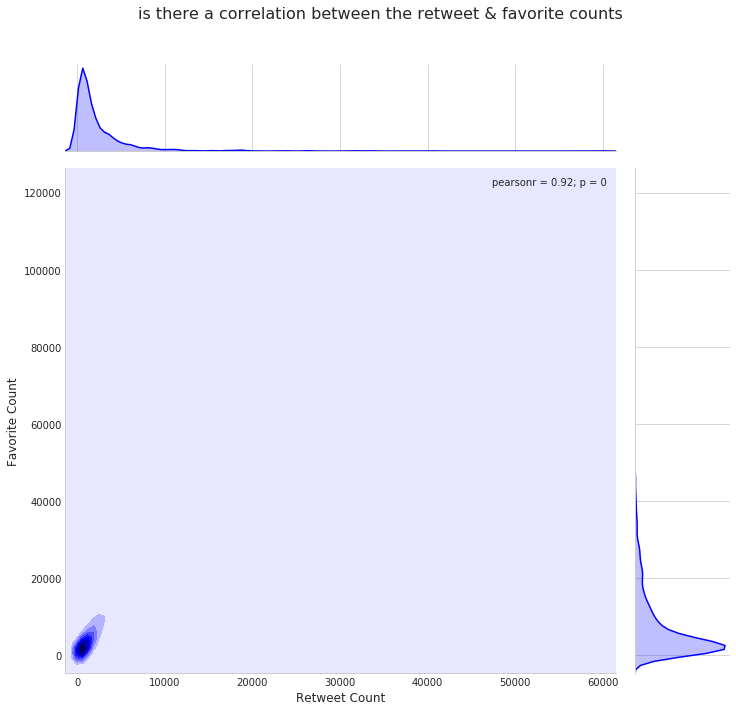

In [74]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g=sns.jointplot(x="retweet_count",
               y="favorite_count",
               data=df_master,
               color="blue",
               kind="kde",
               size=10)
g.set_axis_labels("Retweet Count","Favorite Count",fontsize=12)
g.fig.subplots_adjust(top=0.9)
plt.suptitle('is there a correlation between the retweet & favorite counts',
            fontsize=16)
